# Class 7 Piechart and Sunburst

In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
%ls datasets/

adult.csv                                    data.csv
adultos_vac_tab_ensanut2020_w.Catálogo.xlsx  headbrain.csv
airline_data.csv                             mic2.xlsx
antropometria00.csv                          mic.xlsx
antropometria-dataset-2.csv                  movies.csv
antropometria-dataset.csv                    nhanes_2015_2016.csv
Book3.csv                                    pokemon.csv
Canada.xlsx                                  reg_data.csv
Cartwheeldata.csv                            sample_pivot.csv
census.csv                                   tips.csv
coches.csv                                   weight-height.csv
cwurData.csv


In [3]:
import pandas as pd

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_excel('datasets/mic2.xlsx',
                  engine= 'openpyxl')
#df

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
mpl.style.use('ggplot')

In [10]:
df.columns.tolist()

['Timestamp',
 'Name',
 'Age',
 'Sex',
 'Ocupation',
 'Monthly income ',
 'Price',
 'Quality',
 'Quantity',
 'Availability',
 'Taste',
 'Flavours',
 'Customer relation',
 'Customer services',
 'Texture',
 'Size',
 'Overal satisfaction',
 'Consistency',
 'Factor',
 'Frowned',
 'reason',
 'Popular',
 'My favorite',
 'Kind',
 'Preference',
 'Recommend']

In [11]:
counts = df['Age'].value_counts()
counts

21 - 30    37
<=20        6
31 - 40     4
41 - 50     3
Name: Age, dtype: int64

In [12]:
counts = counts.reindex(['<=20','21 - 30','31 - 40','41 - 50'])
counts

<=20        6
21 - 30    37
31 - 40     4
41 - 50     3
Name: Age, dtype: int64

In [13]:
counts = counts.to_frame()
#frame es table
counts

,Age
<=20,6
21 - 30,37
31 - 40,4
41 - 50,3


In [14]:
counts['%'] = (counts.iloc[:, :]/(counts.loc[:,'Age'].sum(axis = 0)))*100

In [15]:
counts

,Age,%
<=20,6,12.0
21 - 30,37,74.0
31 - 40,4,8.0
41 - 50,3,6.0


In [16]:
counts.columns

Index(['Age', '%'], dtype='object')

In [17]:
counts = counts.reset_index()
counts

,index,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


In [18]:
counts = counts.rename({'index' : 'Age_group'},
                       axis = 1)
counts

,Age_group,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


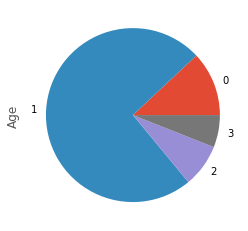

In [19]:
counts['Age'].plot(kind = 'pie')

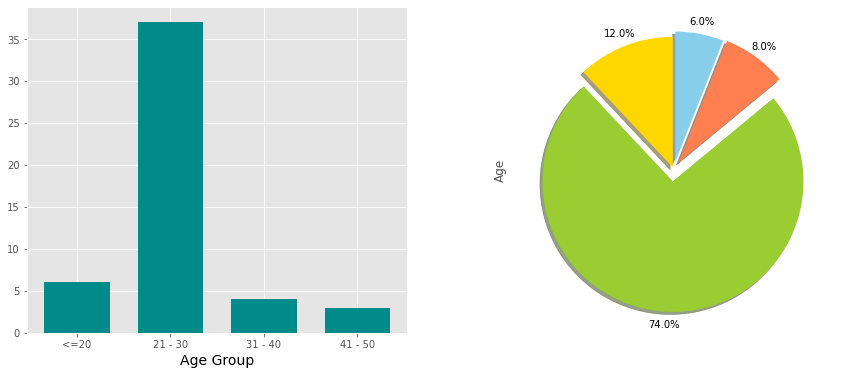

In [24]:
x = list(counts['Age_group'])
y = list(counts['Age'])

plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (15,7)
plt.bar(x, y, width = 0.7, color = 'darkcyan')
plt.xlabel('Age Group', fontweight = 'regular', color = 'black', fontsize = 14, horizontalalignment = 'center')

plt.subplot(1,2,2)
explode_list = [0.02,0.09,0.07,0.06]
color_list = ['gold','yellowgreen','coral','skyblue']
counts['Age'].plot(kind = 'pie',
                  figsize = (15,6),
                  autopct = '%1.1f%%',
                  startangle = 90,
                  shadow = True,
                  pctdistance = 1.1,
                  labels = None,
                   explode = explode_list,
                   colors = color_list
                  )
plt.show()